<a href="https://colab.research.google.com/github/axaysd/SpeciesClassificationNN/blob/main/SpeciesPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
genes_data = pd.read_csv('Genes_Data.csv')
genes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           12000 non-null  object 
 1   Time                     12000 non-null  float64
 2   Location                 12000 non-null  object 
 3   Zone                     12000 non-null  object 
 4   Current_Country          12000 non-null  object 
 5   Habitat                  12000 non-null  object 
 6   Cranial_Capacity         12000 non-null  float64
 7   Height                   12000 non-null  float64
 8   Incisor_Size             12000 non-null  object 
 9   Jaw_Shape                12000 non-null  object 
 10  Torus_Supraorbital       12000 non-null  object 
 11  Prognathism              12000 non-null  object 
 12  Foramen_Mágnum_Position  12000 non-null  object 
 13  Canine Size              12000 non-null  object 
 14  Canines_Shape         

In [3]:
pd.set_option('display.max_columns', None)

genes_data.sample(5)

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,Torus_Supraorbital,Prognathism,Foramen_Mágnum_Position,Canine Size,Canines_Shape,Tooth_Enamel,Tecno,Tecno_type,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
8786,Homo Erectus,1.600136,Asia,west,Indonesia,savannah,1133.87262,163.42774,very small,modern,little protruding,reduced,modern,small,incisiform,thick,yes,mode 1,modern,manipulate,walk,omnivore,medium-high,modern,modern,modern,yes,robust
3376,Homo Erectus,1.254709,Asia,west,Indonesia,savannah,950.09807,161.12295,very small,modern,little protruding,reduced,modern,small,incisiform,thick,yes,mode 1,modern,manipulate,walk,omnivore,medium-high,modern,modern,modern,yes,robust
2086,Paranthropus Robustus,1.919977,Africa,south,South Africa,jungle,470.36495,118.54837,megadony,V shape,ultra protruding,very high,semi-anterior,big,conicalls,very thick,no,no,yes,climbing,climbing,hard fruits,high,wide,no,old,no,robust
742,hominino Ardipithecus ramidus / kabadda,4.094179,Africa,oriental,Ethiopia,mixed,442.52593,117.89352,small,conical,very protruding,high,semi-anterior,small,conicalls,thick-medium,no,no,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
1851,Australopithecus Africanus,4.152738,Africa,south,South Africa,forest-gallery,611.53530,109.99856,small,conical,very protruding,medium-high,anterior,small,incisiform,thick,no,no,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light


In [4]:
# Preprocessing steps
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder()
ss = StandardScaler()

# Setting independent variables
X = genes_data.iloc[:, 1:29]

# Setting dependent variable
y = genes_data.iloc[:, 0:1]

categorical_cols = ["Location","Zone","Current_Country","Habitat","Incisor_Size","Jaw_Shape","Torus_Supraorbital","Prognathism","Foramen_Mágnum_Position","Canine Size","Canines_Shape","Tooth_Enamel","Tecno","Tecno_type","biped","Arms","Foots","Diet","Sexual_Dimorphism","Hip","Vertical_Front","Anatomy","Migrated","Skeleton"]

X_coded = ohe.fit_transform(X[categorical_cols]).toarray()

y_coded = ohe.fit_transform(y).toarray()

X_numeric = X.drop(columns=categorical_cols)

X_scaled = ss.fit_transform(X_numeric)

X_ready = pd.concat([pd.DataFrame(X_coded), pd.DataFrame(X_scaled)], axis=1)

X_ready = X_ready.values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ready, y_coded, test_size=0.2, random_state=0)

import tensorflow as tf

X_train_tensor = tf.convert_to_tensor(X_train)
y_train_tensor = tf.convert_to_tensor(y_train)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(24, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6656      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 24)                792       
                                                                 
Total params: 10584 (41.34 KB)
Trainable params: 10584 (41.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
270/270 [==============================] - 6s 8ms/step - loss: 0.7738 - accuracy: 0.8596 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/10
270/270 [==============================] - 2s 6ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 9.1792e-04 - val_accuracy: 1.0000
Epoch 4/10
270/270 [==============================] - 2s 6ms/step - loss: 6.7441e-04 - accuracy: 1.0000 - val_loss: 4.9212e-04 - val_accuracy: 1.0000
Epoch 5/10
270/270 [==============================] - 2s 6ms/step - loss: 3.8441e-04 - accuracy: 1.0000 - val_loss: 2.9339e-04 - val_accuracy: 1.0000
Epoch 6/10
270/270 [==============================] - 2s 6ms/step - loss: 2.3624e-04 - accuracy: 1.0000 - val_loss: 1.9056e-04 - val_accuracy: 1.0000
Epoch 7/10
270/270 [==============================] - 3s 12ms/step - loss: 1.5995e-04 - accuracy: 1.0000 - val_loss: 1.3

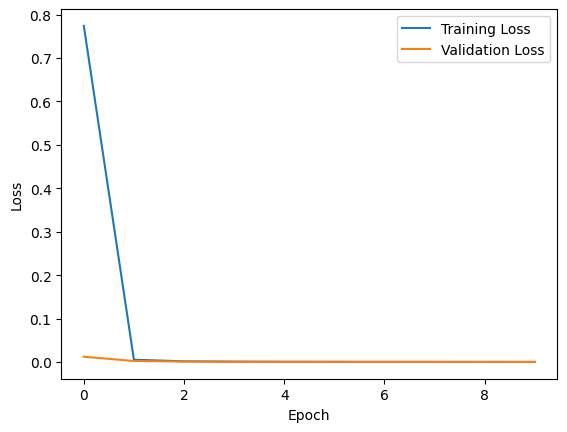

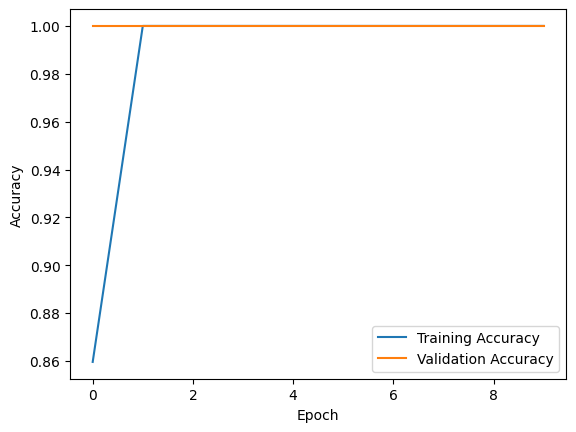

In [9]:
import matplotlib.pyplot as plt

history = model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=32,validation_split=0.1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()